# **Data Visualisation**

## Objectives

* Answer business requirements:
 - Determine the population distribution of butterfly and moth population, based on data collected so far.
 - Present a visual average of each cllassification, and determine whether this can assist in educating researchers in collecting the data.
 - Present a visual varience of each classification, and determine if this can assist in educating researchers in diferenitating between species.
 - Create an image montage of random selections of each classification, for reference.

## Inputs

* inputs/butterfly_moth/images/test
* inputs/butterfly_moth/images/validation
* inputs/butterfly_moth/images/train

## Outputs

* Distribution of population per label plot.
* Average and variablity of images per label plot.
* Image montage of each classification.

## Additional Comments

* No comments.



---

## Library Imports and Working Directory Change

In [36]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
from matplotlib.image import imread
sns.set_style('white')

In [ ]:
cwd = os.getcwd()

In [30]:
os.chdir('workspace/portfolio-project-5/')
print("You set a new current directory")

You set a new current directory


In [31]:
work_dir = os.getcwd()
work_dir

'/workspace/portfolio-project-5'

---

# Set Directories

## Input

Set train, validation and test paths.

In [32]:
img_data_dir = 'inputs/butterfly_moth/images'
train_path = img_data_dir + '/train'
test_path = img_data_dir + '/test'
validation_path = img_data_dir + '/validation'

## Output

In [33]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

Set label name.

In [34]:
labels = os.listdir(train_path)
print(f'Labels: {labels}')

Labels: ['adonis', 'african_giant_swallowtail', 'american_snoot', 'an_88', 'appollo', 'arcigera_flower_moth', 'atala', 'atlas_moth', 'banded_orange_heliconian', 'banded_peacock', 'banded_tiger_moth', 'beckers_white', 'bird_cherry_ermine_moth', 'black_hairstreak', 'blue_morpho', 'blue_spotted_crow', 'brookes_birdwing', 'brown_argus', 'brown_siproeta', 'cabbage_white', 'cairns_birdwing', 'chalk_hill_blue', 'checquered_skipper', 'chestnut', 'cinnabar_moth', 'clearwing_moth', 'cleopatra', 'clodius_parnassian', 'clouded_sulphur', 'comet_moth', 'common_banded_awl', 'common_wood-nymph', 'copper_tail', 'crecent', 'crimson_patch', 'danaid_eggfly', 'eastern_coma', 'eastern_dapple_white', 'eastern_pine_elfin', 'elbowed_pierrot', 'emperor_gum_moth', 'garden_tiger_moth', 'giant_leopard_moth', 'glittering_sapphire', 'gold_banded', 'great_eggfly', 'great_jay', 'green_celled_cattleheart', 'green_hairstreak', 'grey_hairstreak', 'hercules_moth', 'humming_bird_hawk_moth', 'indra_swallow', 'io_moth', 'iph

---

# Image Shape

Determine if the images are all the same size, if not, what is the average shape.

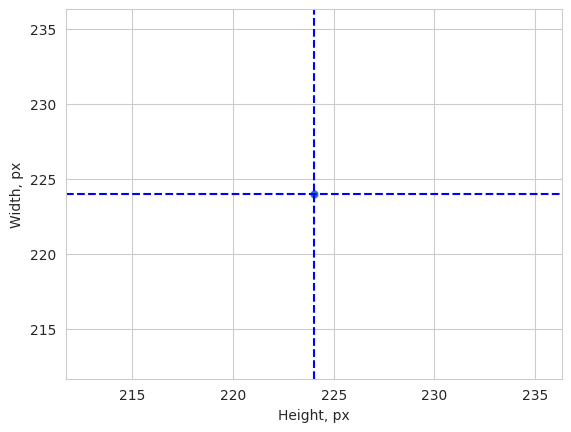

Average width is 224.
 Average height is 224
Height and width match for all images. All images are the same size.


In [45]:
width = []
height = []

for label in labels:
    for img_name in os.listdir(train_path + '/' + label):
        image = imread(train_path + '/' + label + '/' + img_name)
        h, w, colors = image.shape
        height.append(h)
        width.append(w)


sns.set_style('whitegrid')
fig, axes = plt.subplots()
sns.scatterplot(x=height, y=width, alpha=0.4)
axes.set_xlabel('Height, px')
axes.set_ylabel('Width, px')
mean_height = int(np.array(height).mean())
mean_width = int(np.array(width).mean())
axes.axvline(x=mean_height, color='b', linestyle='--')
axes.axhline(y=mean_width, color='b', linestyle='--')
plt.show()
print(f'Average width is {mean_width}.\n Average height is {mean_height}')


height_array = np.array(height)
width_array = np.array(width)
unique_height = np.unique(height_array)
unique_width = np.unique(width_array)

if len(unique_height) == 1 and len(unique_width) == 1:
    print('Height and width match for all images. All images are the same size.')



---

# Population Distribution

Determine the total population and the population distribution based on the recorded data so far.

In [52]:
image_data = []

for label in labels:
    species = os.path.join(train_path, label)
    count = len([name for name in os.listdir(species) if os.path.isfile(os.path.join(species, name))])

    image_data.append({'Species': label, 'Recorded Population': count})

species_df = pd.DataFrame(image_data)
total_population = species_df['Recorded Population'].sum()

print(species_df)
print(f'Total Recorded Population: {total_population}')

                      Species  Recorded Population
0                      adonis                   91
1   african_giant_swallowtail                   78
2              american_snoot                   77
3                       an_88                   88
4                     appollo                   93
..                        ...                  ...
95                    viceroy                   84
96    white_lined_sphinx_moth                  103
97                 wood_satyr                   74
98        yellow_swallow_tail                   78
99            zebra_long_wing                   76

[100 rows x 2 columns]
Total Recorded Population: 9117


Plot the total population by species.

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
